In [1]:
import pandas as pd

In [2]:
df_long =  pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',encoding='cp949', low_memory = False)
df_long

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


In [3]:
print(df_long.shape) #row, columns 표현

(23837317, 10)


열 한글으로 이쁘게 바꾸기 ~~

In [4]:
df_long.columns = ['기준일자','시간','외국인국적코드','시구분','행정동코드','행정동명','거주인구','근무인구','방문인구','거주지역행정구역']

In [5]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837317 entries, 0 to 23837316
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   기준일자      object 
 1   시간        int64  
 2   외국인국적코드   object 
 3   시구분       object 
 4   행정동코드     int64  
 5   행정동명      object 
 6   거주인구      float64
 7   근무인구      float64
 8   방문인구      float64
 9   거주지역행정구역  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.8+ GB


날짜데이터 처리 방법

In [5]:
df_long['기준일자'] #시리즈형태(순열)

0           2018-01-01
1           2018-01-01
2           2018-01-01
3           2018-01-01
4           2018-01-01
               ...    
23837312    2021-06-30
23837313    2021-06-30
23837314    2021-06-30
23837315    2021-06-30
23837316    2021-06-30
Name: 기준일자, Length: 23837317, dtype: object

In [6]:
df_long['날짜_datetime']=pd.to_datetime(df_long['기준일자'])

In [8]:
df_long.head(2)

,기준일자,시간,외국인국적코드,시구분,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역,날짜_datetime
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0,4.5802,제주,2018-01-01
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0,5.7051,제주,2018-01-01


In [7]:
df_long['연도']=df_long['날짜_datetime'].dt.year
df_long['월']=df_long['날짜_datetime'].dt.month

In [8]:
pd.pivot_table(data=df_long,index='연도',values='거주인구',aggfunc='sum')

,거주인구
연도,
2018,1.392683e+08
2019,1.334456e+08
2020,1.332167e+08
2021,6.850198e+07


In [9]:
df_long['주차']=df_long['날짜_datetime'].dt.week
df_long['일']=df_long['날짜_datetime'].dt.day
df_long['요일']=df_long['날짜_datetime'].dt.day_name()

<ipython-input-9-59388f99273c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_long['주차']=df_long['날짜_datetime'].dt.week


In [12]:
df_long.head(2)

,기준일자,시간,외국인국적코드,시구분,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역,날짜_datetime,연도,월,주차,일,요일
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0,4.5802,제주,2018-01-01,2018,1,1,1,Monday
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0,5.7051,제주,2018-01-01,2018,1,1,1,Monday


In [13]:
pd.pivot_table(data=df_long,index='월',values='거주인구',aggfunc='sum')

,거주인구
월,
1,4.731746e+07
2,4.326239e+07
3,4.580006e+07
4,4.515904e+07
5,4.580569e+07
6,4.302241e+07
7,3.252713e+07
8,3.295712e+07
9,3.348490e+07


그래프 출력까지

<AxesSubplot:xlabel='월'>

C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50900 missing from c

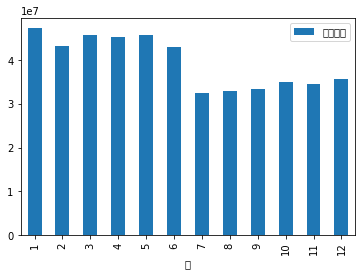

In [14]:
pd.pivot_table(data=df_long,index='월',values='거주인구',aggfunc='sum').plot(kind='bar')

# 시계열분석 ( Time Series )

* 시간 : 특정간격 갖는 시간 (Lag)
* 일변량 정상 시계열 : ARIMA
* Trend : 추세
* Seasonality : 계절성
* Cycle : 주기
* Noise : 잡음 -> White Noise

* lineplot, point plot 사용

In [10]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font',family='Maigun Gothic')

In [16]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837317 entries, 0 to 23837316
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   기준일자         object        
 1   시간           int64         
 2   외국인국적코드      object        
 3   시구분          object        
 4   행정동코드        int64         
 5   행정동명         object        
 6   거주인구         float64       
 7   근무인구         float64       
 8   방문인구         float64       
 9   거주지역행정구역     object        
 10  날짜_datetime  datetime64[ns]
 11  연도           int64         
 12  월            int64         
 13  주차           int64         
 14  일            int64         
 15  요일           object        
dtypes: datetime64[ns](1), float64(3), int64(6), object(6)
memory usage: 2.8+ GB


In [17]:
df_long.head(2)

,기준일자,시간,외국인국적코드,시구분,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역,날짜_datetime,연도,월,주차,일,요일
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0,4.5802,제주,2018-01-01,2018,1,1,1,Monday
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0,5.7051,제주,2018-01-01,2018,1,1,1,Monday


In [18]:
df_long['날짜_datetime'].describe()

<ipython-input-18-6ef77de81ac4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_long['날짜_datetime'].describe()


count                23837317
unique                   1277
top       2020-10-02 00:00:00
freq                    22840
first     2018-01-01 00:00:00
last      2021-06-30 00:00:00
Name: 날짜_datetime, dtype: object

In [11]:
df_long['연도']=df_long['날짜_datetime'].dt.year
df_long['월']=df_long['날짜_datetime'].dt.month
df_long['주차']=df_long['날짜_datetime'].dt.week
df_long['요일']=df_long['날짜_datetime'].dt.day_name()

<ipython-input-11-e217c4df9387>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_long['주차']=df_long['날짜_datetime'].dt.week


In [20]:
df_long.head(2)

,기준일자,시간,외국인국적코드,시구분,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역,날짜_datetime,연도,월,주차,일,요일
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0,4.5802,제주,2018-01-01,2018,1,1,1,Monday
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0,5.7051,제주,2018-01-01,2018,1,1,1,Monday


KeyboardInterrupt: 

findfont: Font family ['Maigun Gothic'] not found. Falling back to DejaVu Sans.


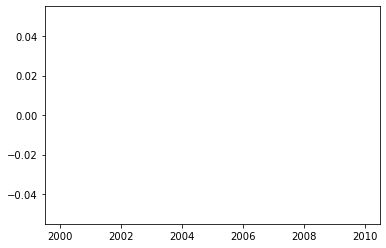

In [12]:
sns.lineplot(data=df_long,x='날짜_datetime',y='거주인구', estimator=sum) # sum 안쓰면 평균

In [13]:
#일별 합
p1 = pd.pivot_table(data=df_long, 
               index='날짜_datetime', 
               values= '거주인구',aggfunc='sum').reset_index()

In [14]:
p1

,날짜_datetime,거주인구
0,2018-01-01,372965.1897
1,2018-01-02,393098.7343
2,2018-01-03,387288.8966
3,2018-01-04,381849.4039
4,2018-01-05,391165.2252
...,...,...
1272,2021-06-26,333659.4945
1273,2021-06-27,340182.6747
1274,2021-06-28,337373.3487
1275,2021-06-29,332689.5532


<AxesSubplot:xlabel='날짜_datetime', ylabel='거주인구'>

C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from c

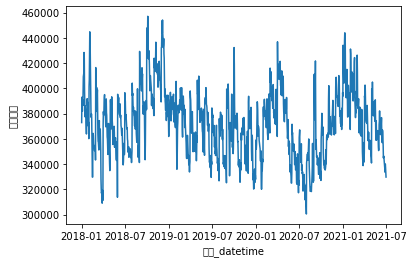

In [24]:
sns.lineplot(data=p1, x ='날짜_datetime',y='거주인구')

In [15]:
#일별 합
p2 = pd.pivot_table(data=df_long, 
               index='날짜_datetime', 
               values= '방문인구',aggfunc='sum').reset_index()

<AxesSubplot:xlabel='날짜_datetime', ylabel='방문인구'>

C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from c

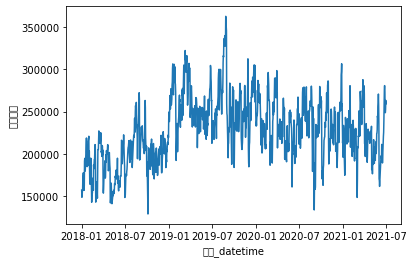

In [26]:
sns.lineplot(data=p2, x ='날짜_datetime',y='방문인구')

In [33]:
df_long.head(2)

,기준일자,시간,외국인국적코드,시구분,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역,날짜_datetime,연도,월,주차,일,요일
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0,4.5802,제주,2018-01-01,2018,1,1,1,Monday
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0,5.7051,제주,2018-01-01,2018,1,1,1,Monday


In [60]:
#시간 넘 오래걸려서 안돌아가,,,
sns.lineplot(data=df_long, x ='날짜_datetime',y='행정동명', hue='방문인구')

KeyboardInterrupt: 

C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50528 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from c

Error in callback <function flush_figures at 0x0000013C76F884C0> (for post_execute):


KeyboardInterrupt: 

**ARIMA (Auto Regressive Integrated Moving Average Model)**

* AR (Auto Reg. Model) : 자기회귀모델 (특정시점전의 자료가 현재에 영향을 주는 모델)
                        - ACF : 자기상관함수 / 특정 구간 내 데이터간 상관관계
                        - PACF : 부분자기상관함수 - 이전데이터와 지금데이터의 상관관계
                        
* MA (Moving Average Model) : 이동평균모델 (일정한 구간 평균 계산해서 미래 예측)

* Difference 차분 : 정상성이 만족하지 않는 데이터 (EX 평균 감소/증가, 표준편차 증감 그래프)

**ARIMA Model**
- 단기예측에 적합
- 계절적 변동요인(주기적 변동)
- sample>50
- 정성적자료 -> 차분 적용해서 arima 사용

In [16]:
import statsmodels.tsa.api as tsa #ARIMA 쓸 때 라이브러리

In [38]:
df_long.head()

,기준일자,시간,외국인국적코드,시구분,행정동코드,행정동명,거주인구,근무인구,방문인구,거주지역행정구역,날짜_datetime,연도,월,주차,일,요일
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주,2018-01-01,2018,1,1,1,Monday
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주,2018-01-01,2018,1,1,1,Monday
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외,2018-01-01,2018,1,1,1,Monday
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외,2018-01-01,2018,1,1,1,Monday
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주,2018-01-01,2018,1,1,1,Monday


In [17]:
df_time = pd.pivot_table(data=df_long,index='날짜_datetime',values='방문인구',aggfunc='sum')
df_time.head(2) #시계열 table을 만든 것

,방문인구
날짜_datetime,
2018-01-01,157173.6117
2018-01-02,148716.1041


In [18]:
#일주일 단위로 묶기

y = df_time['방문인구'].resample('1W').mean()

In [19]:
#중간에 missing 값 있는지 확인 해줘야 함
y.isnull().sum()
#여긴 없지만 만약 있으면 y.fillna(method='ffill')로 missing value 채워주기
#bfill (뒤에있는 데이터), ffill (앞에있는 데이터)

0

* 시계열 분해
    - Trend (경향성)
    - Sesonality (계쩔성)
    - Cycle / Resdisual (불규칙 및 순환)

findfont: Font family ['Maigun Gothic'] not found. Falling back to DejaVu Sans.
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jisuj\anaconda3\lib\site-packages\matp

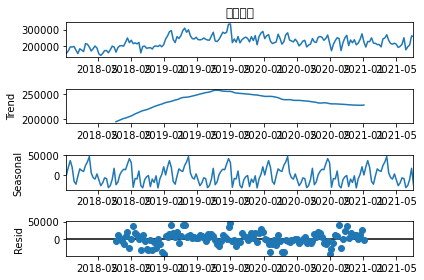

In [20]:
#시계열 모델 생성
model_series = tsa.seasonal_decompose(y,model = 'additive')
#모델 시각화
fig = model_series.plot()

In [21]:
 from pylab import rcParams
 # 그래프 이쁘게 (크게) 그리기
rcParams['figure.figsize']=15,10

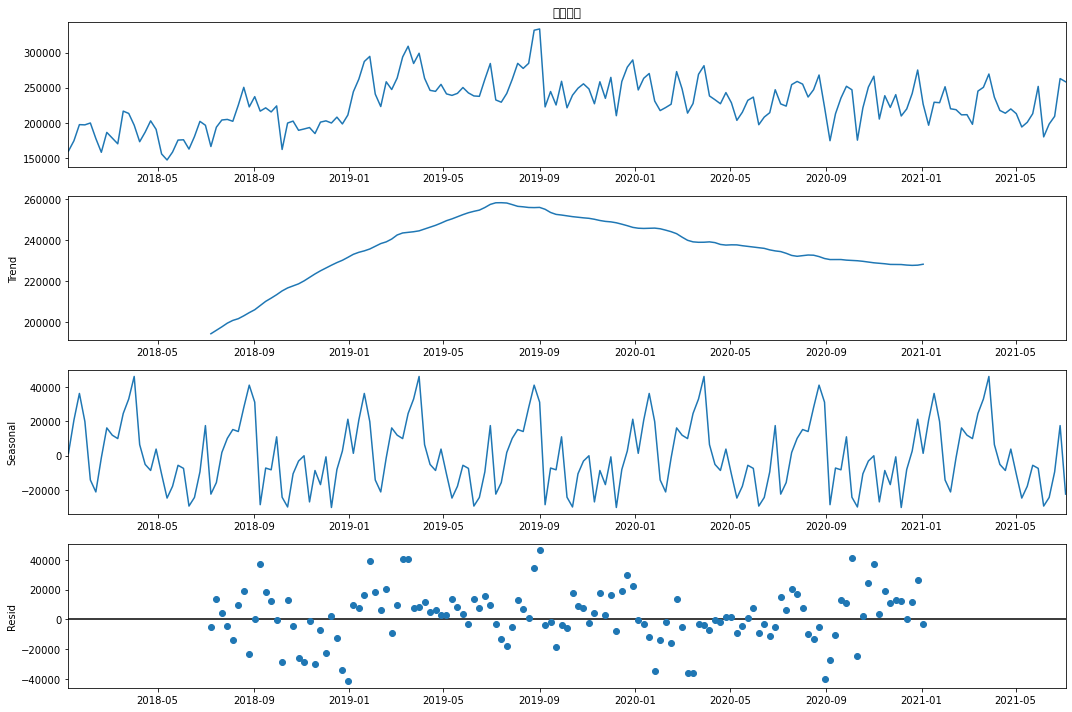

In [22]:
fig = model_series.plot()

In [23]:
import itertools

In [24]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
# p : 난수 --> 몇일 전 자료가 영향을 미치는지 ~
seasonal_pdq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p,d,q))] 

In [25]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [26]:
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order=param,
                                        seasonal_order = param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

In [65]:
len(param_list)

64

In [66]:
len(param_seasonal_list)

64

In [69]:
len(results_AIC_list)

64

In [27]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})

**Likelihood( 최대 우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
- 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)

**AIC : 데이터에 대한 모델의 상대적 품질**
- AIC = -2ln(L) + 2k
- 값이 낮을수록 모형 적합도가 높은 것을 의미한다

**BIC : 베이지안 정보 기준 **
- BIC = -2 ln(L) + log(n)p
- 변수가 더 많은 경우, aic에 더 많은 패널티를 부여해 계산

**HQIC **
- HQIC = -2ln(L) + 2k ln(ln(n))

In [28]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 12)",3665.101102
27,"(0, 1, 1)","(0, 1, 1, 12)",3671.746610
31,"(0, 1, 1)","(1, 1, 1, 12)",3673.041172
59,"(1, 1, 1)","(0, 1, 1, 12)",3687.662643
43,"(1, 0, 1)","(0, 1, 1, 12)",3692.135622
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",4518.388941
12,"(0, 0, 1)","(1, 0, 0, 12)",4547.589277
1,"(0, 0, 0)","(0, 0, 1, 12)",4588.411590
8,"(0, 0, 1)","(0, 0, 0, 12)",4860.828482


In [33]:
#다음날짜 예측
mod = tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               방문인구   No. Observations:                  183
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1827.551
Date:                            Wed, 11 Aug 2021   AIC                           3665.101
Time:                                    23:52:55   BIC                           3680.350
Sample:                                01-07-2018   HQIC                          3671.295
                                     - 07-04-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3883      0.201      1.927      0.054      -0.007       0.783
ma.L1         -0.7722      0.145   

In [ ]:
- Order( p,d,q). Season order (P,D,Q,M)
    - p : AR에서의 p값(p구간 내 데이터 사이의 상관관계)
    - d : 차분
    - q : q MA PACF 편상관계수 q값
    - P 
    - D 
    - Q
    - M
-Ljung-Box Test : 일정 기간 동안 관측치가 랜덤이고, 독립적인지 여부를 검ㅁ정
    - 귀무 : 데이터가 상관관계를 나타내지 않는다

- Jarque-Bera (JB) : 왜도와 첨도가 정규분포와 일치하는지 가설검정
    - 귀무 : 해당 잔차는 정규분포와 같다